# Line plots in python
- Download stocks data
- Creating Line Plots
- Resampling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Downloading stock price data using yfinance

In [2]:
import yfinance as yf

data = yf.download("RELIANCE.NS", start="2020-01-01", end="2024-11-01")
print(data.head(10))

[*********************100%%**********************]  1 of 1 completed

                  Open        High  ...   Adj Close    Volume
Date                                ...                      
2020-01-01  693.978516  698.138733  ...  673.333252  14004468
2020-01-02  691.235535  704.470520  ...  684.796387  17710316
2020-01-03  700.835999  704.790527  ...  685.621582  20984698
2020-01-06  694.892883  698.504456  ...  669.720398  24519177
2020-01-07  694.435669  701.521790  ...  680.023743  16683622
2020-01-08  692.607056  701.498901  ...  674.916748  16047902
2020-01-09  703.396179  708.607849  ...  690.461060  14982742
2020-01-10  709.476440  712.242310  ...  690.304871  12478359
2020-01-13  706.344910  712.585205  ...  688.543091  18282382
2020-01-14  704.036194  708.607849  ...  682.164734  15816535

[10 rows x 6 columns]


In [3]:
print(data.tail(10))

                   Open         High  ...    Adj Close    Volume
Date                                  ...                       
2024-10-18  1352.175049  1368.425049  ...  1359.300049  12082452
2024-10-21  1367.125000  1374.000000  ...  1369.199951  14067408
2024-10-22  1369.199951  1376.000000  ...  1343.349976  15831960
2024-10-23  1337.500000  1357.474976  ...  1338.525024  17214742
2024-10-24  1335.275024  1343.699951  ...  1339.800049  22155934
2024-10-25  1343.500000  1344.349976  ...  1327.849976  18597496
2024-10-28  1337.000000  1353.000000  ...  1334.349976  10824350
2024-10-29  1328.099976  1343.199951  ...  1340.000000  12008361
2024-10-30  1335.000000  1350.000000  ...  1343.900024  11984423
2024-10-31  1340.000000  1343.000000  ...  1332.050049   9331650

[10 rows x 6 columns]


## Basic plot using pandas

<Axes: xlabel='Date'>

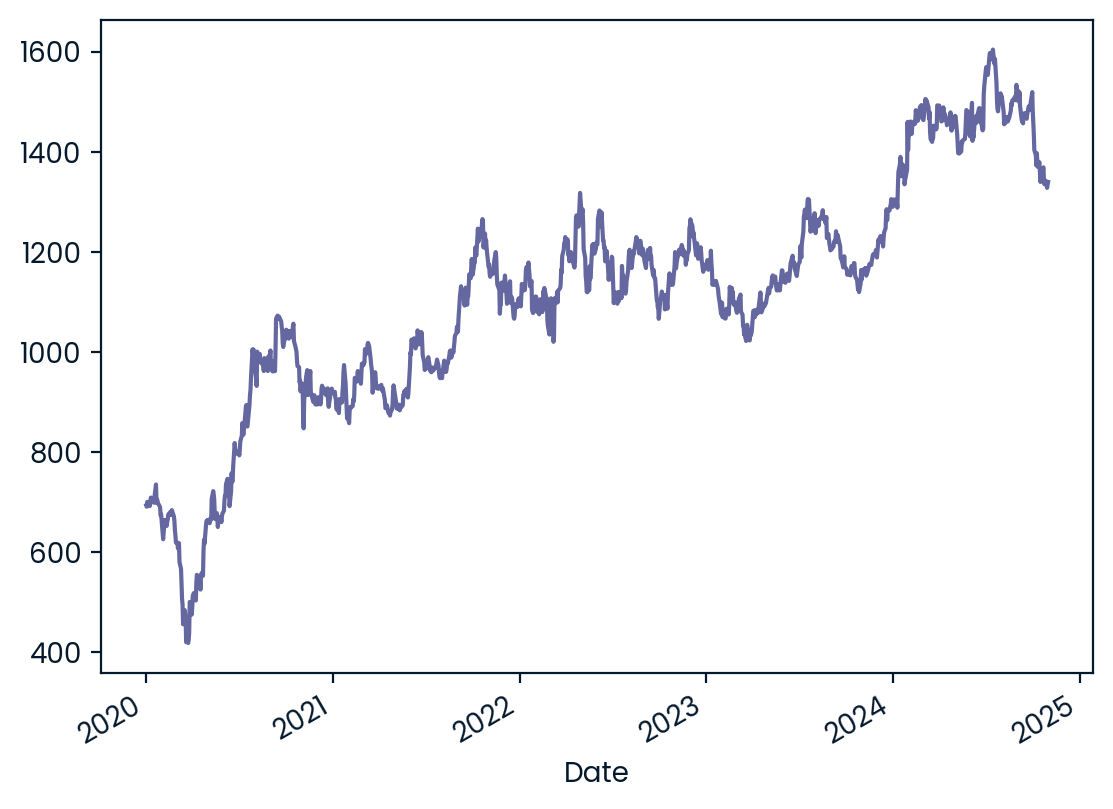

In [4]:
# Plotting using pandas
data['Open'].plot()

In [5]:
df = data

## Plot using matplotlib library
- Adding title
- Adding xlabel
- Adding ylabel

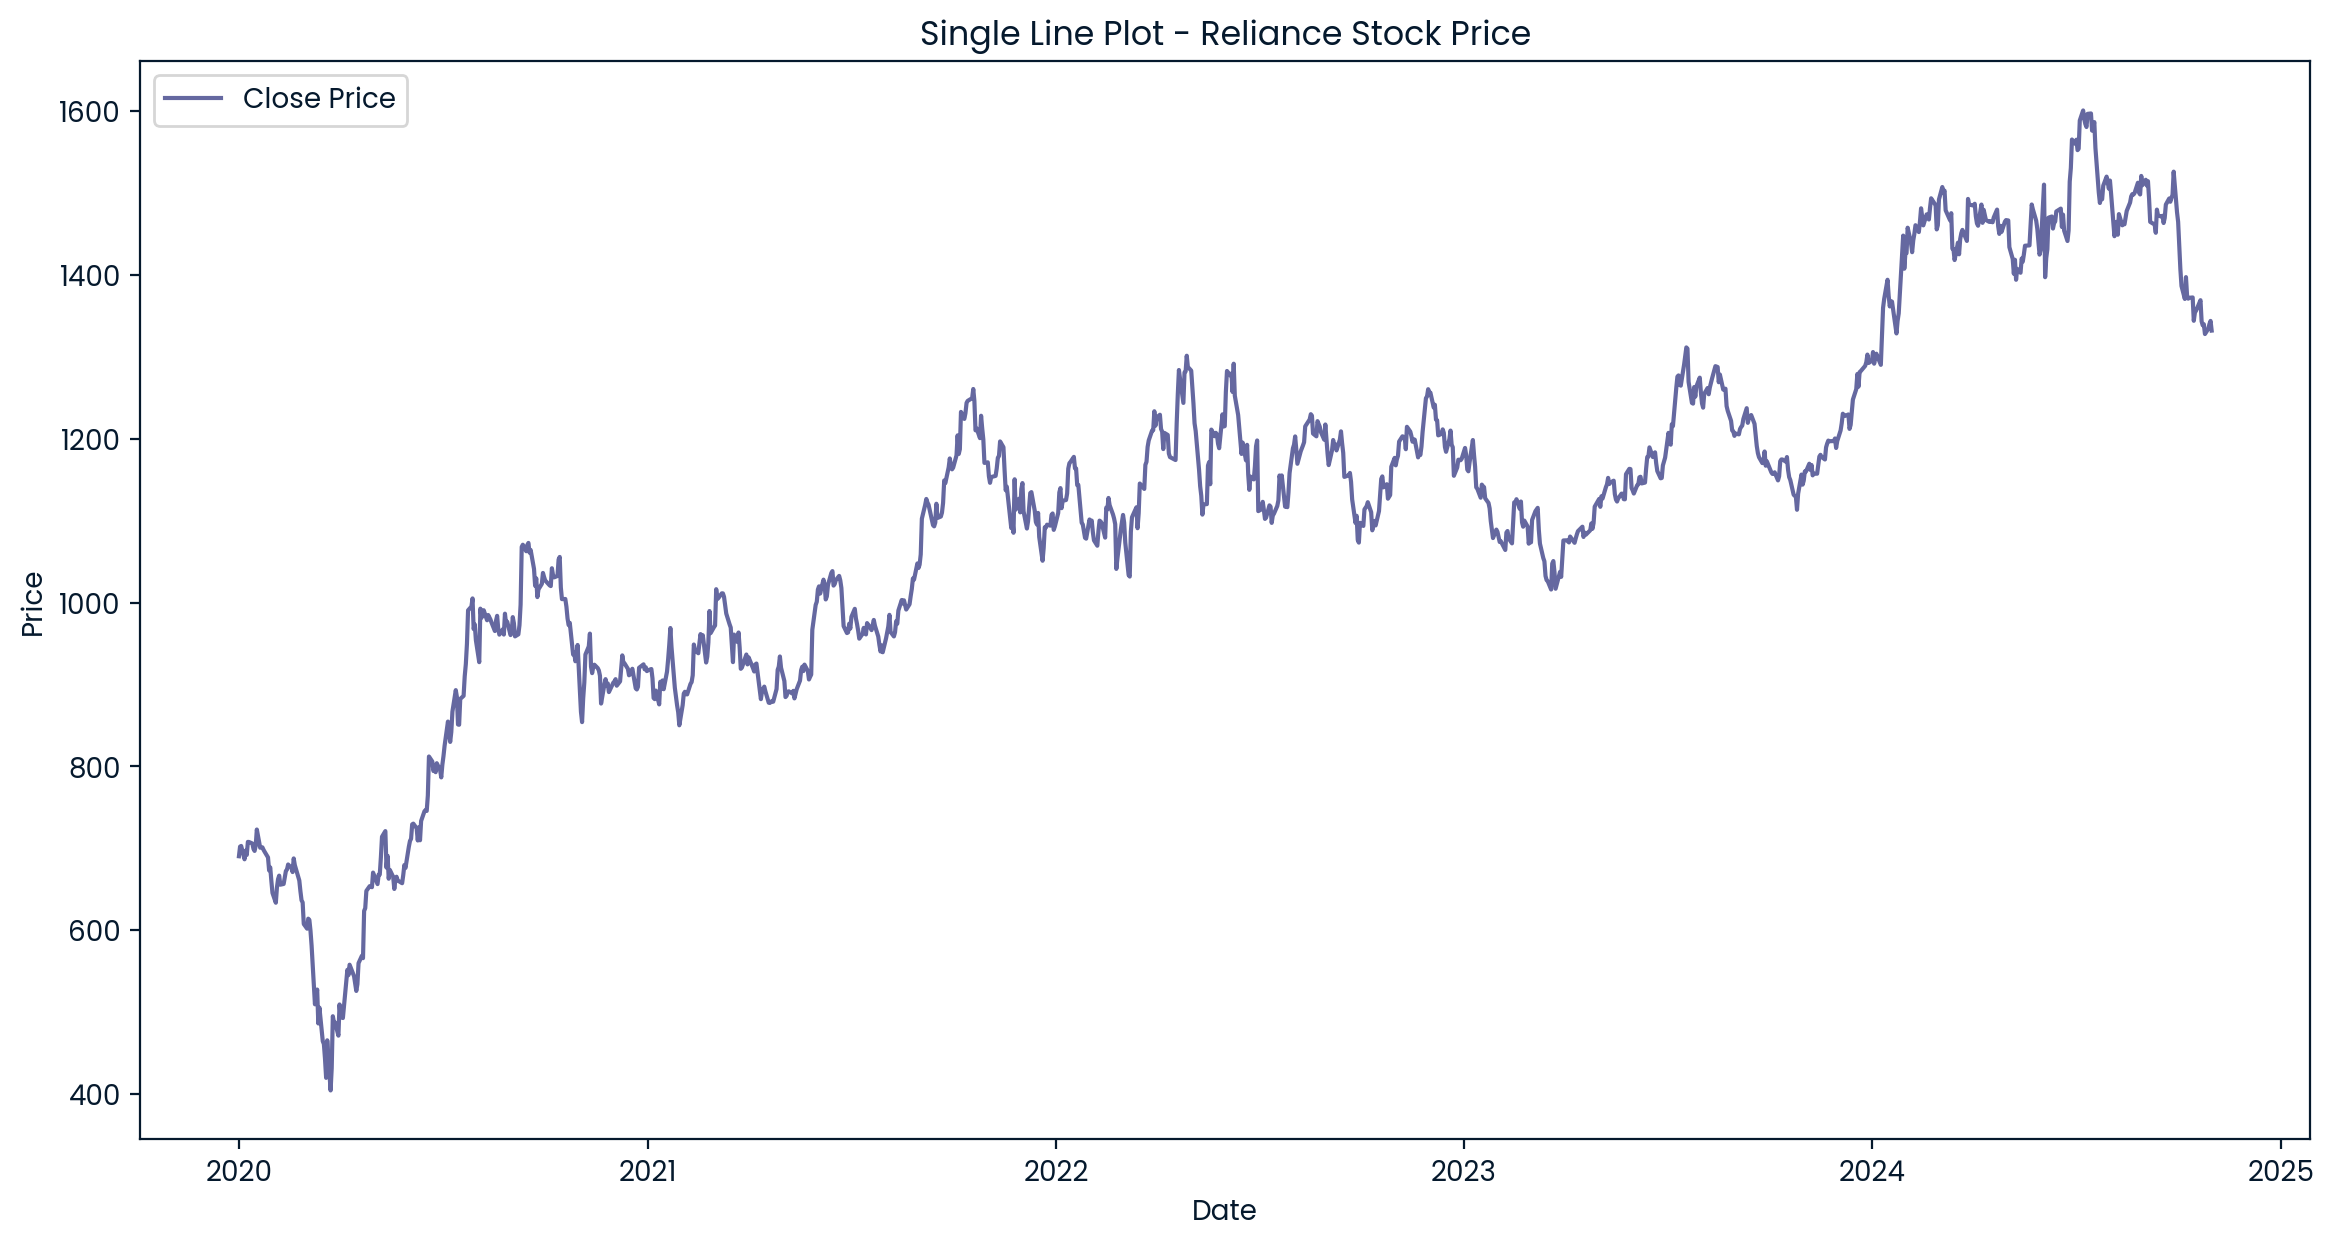

In [6]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')

plt.title('Single Line Plot - Reliance Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Adding rolling mean to the plot 

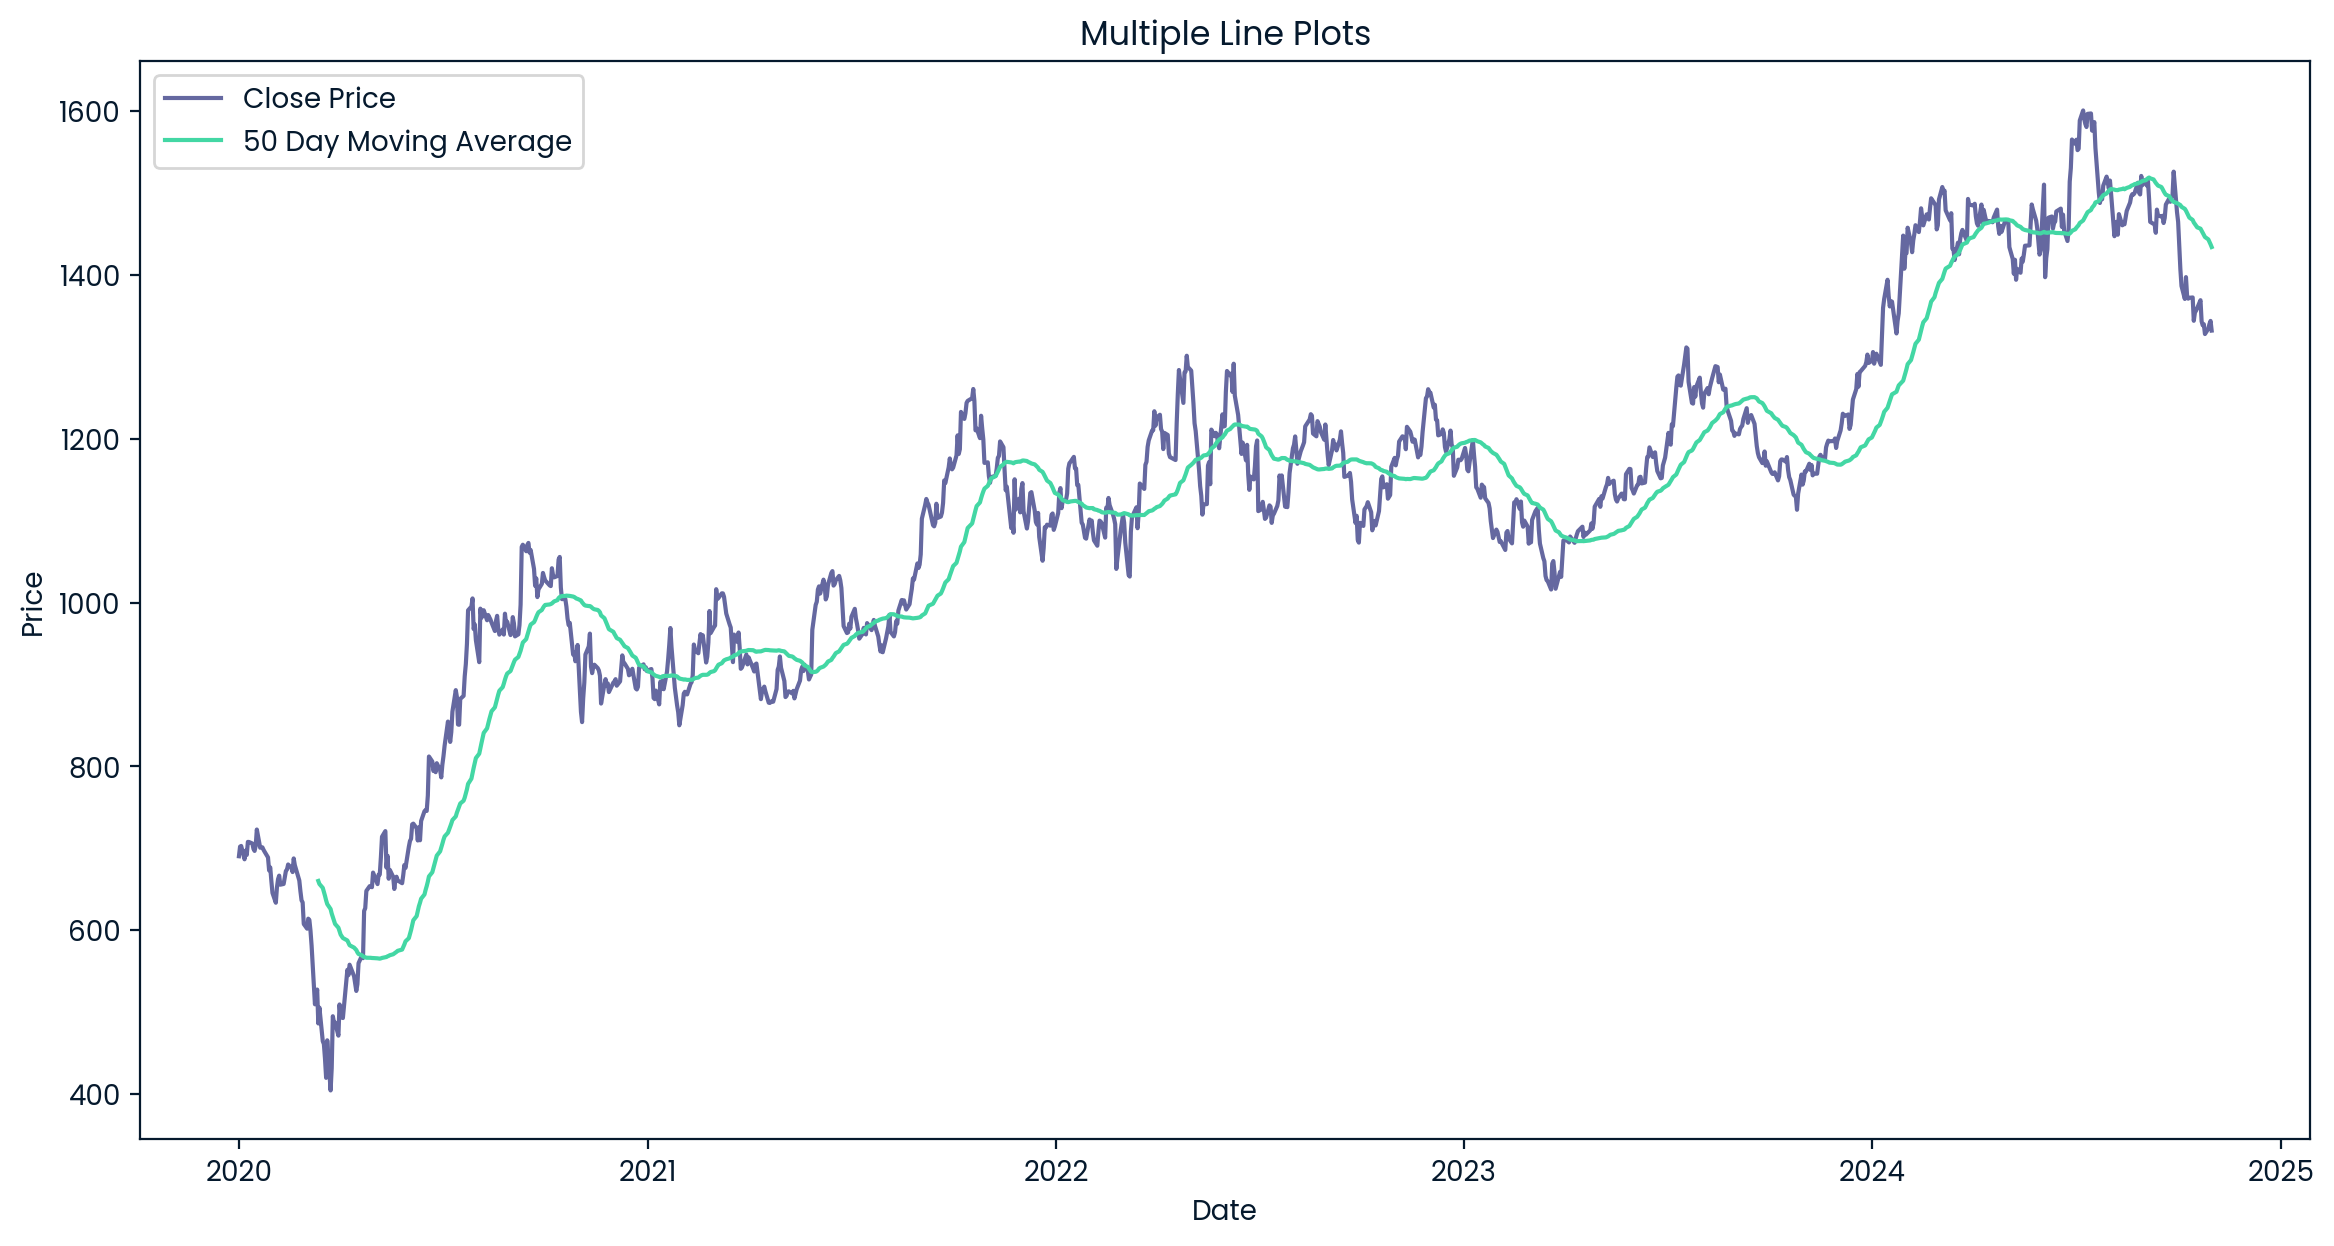

In [7]:
# Creating rolling window column
df['MA50'] = df['Close'].rolling(window=50).mean()
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA50'], label = '50 Day Moving Average')

plt.title('Multiple Line Plots')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


## Adding custom line styles and colors

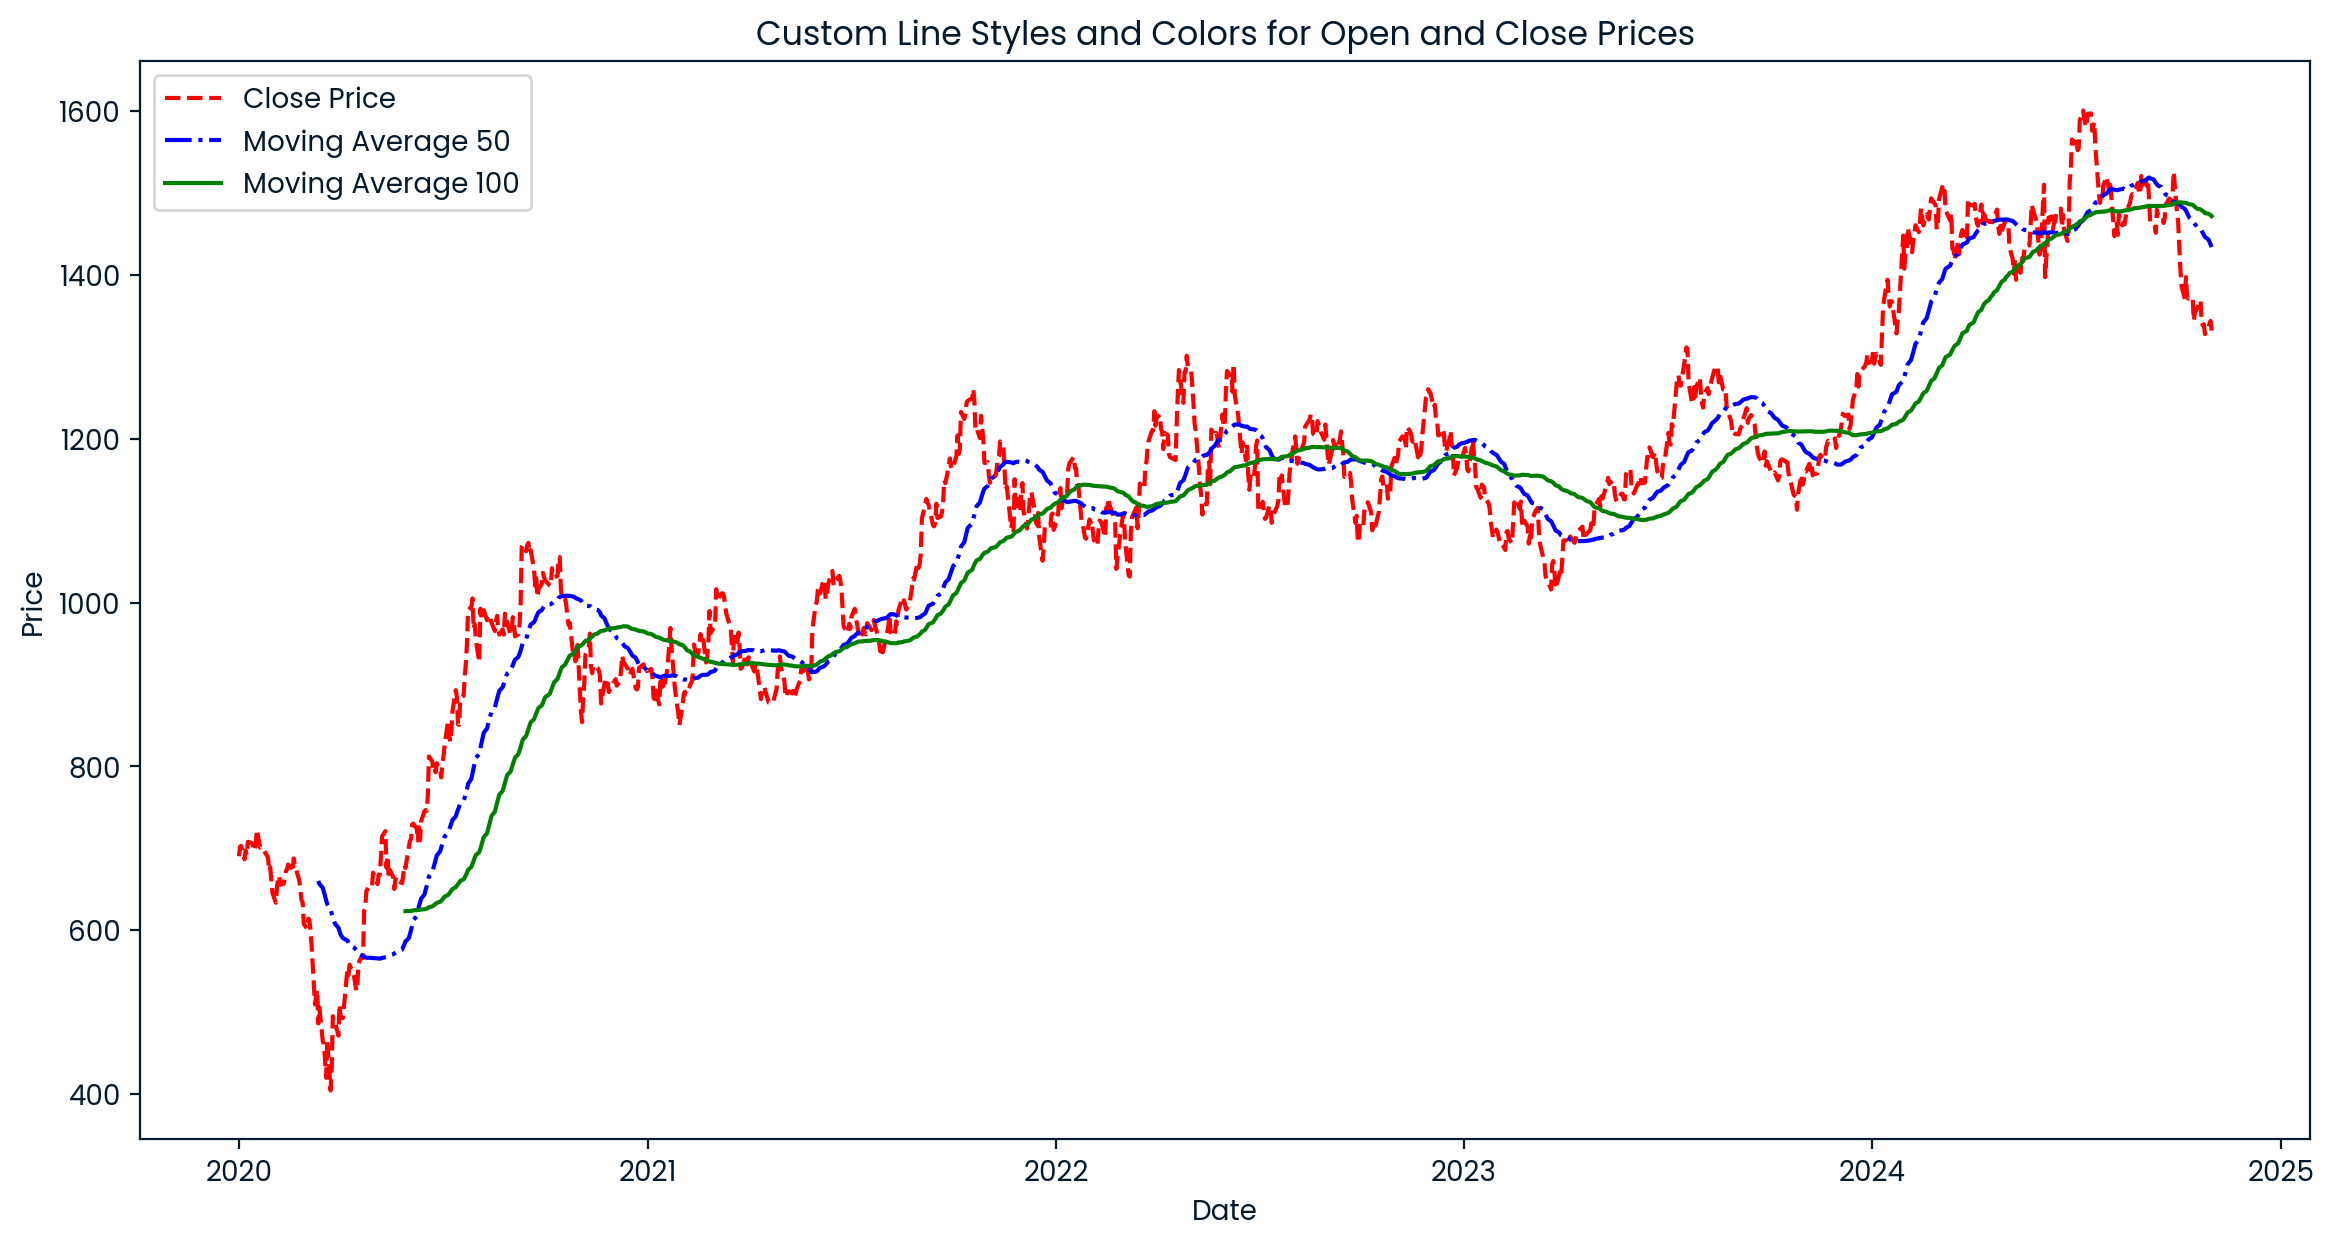

In [8]:
df['MA100'] = df['Close'].rolling(window=100).mean()
# Customizing Line Styles and Colors
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], 'r--', label='Close Price')  # Red dashed line
plt.plot(df['MA50'], 'b-.', label='Moving Average 50')  # Blue dash-dot line
plt.plot(df['MA100'], 'g', label='Moving Average 100') # Green line
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Custom Line Styles and Colors for Open and Close Prices')
plt.legend()

plt.show()

## Adding Annotations

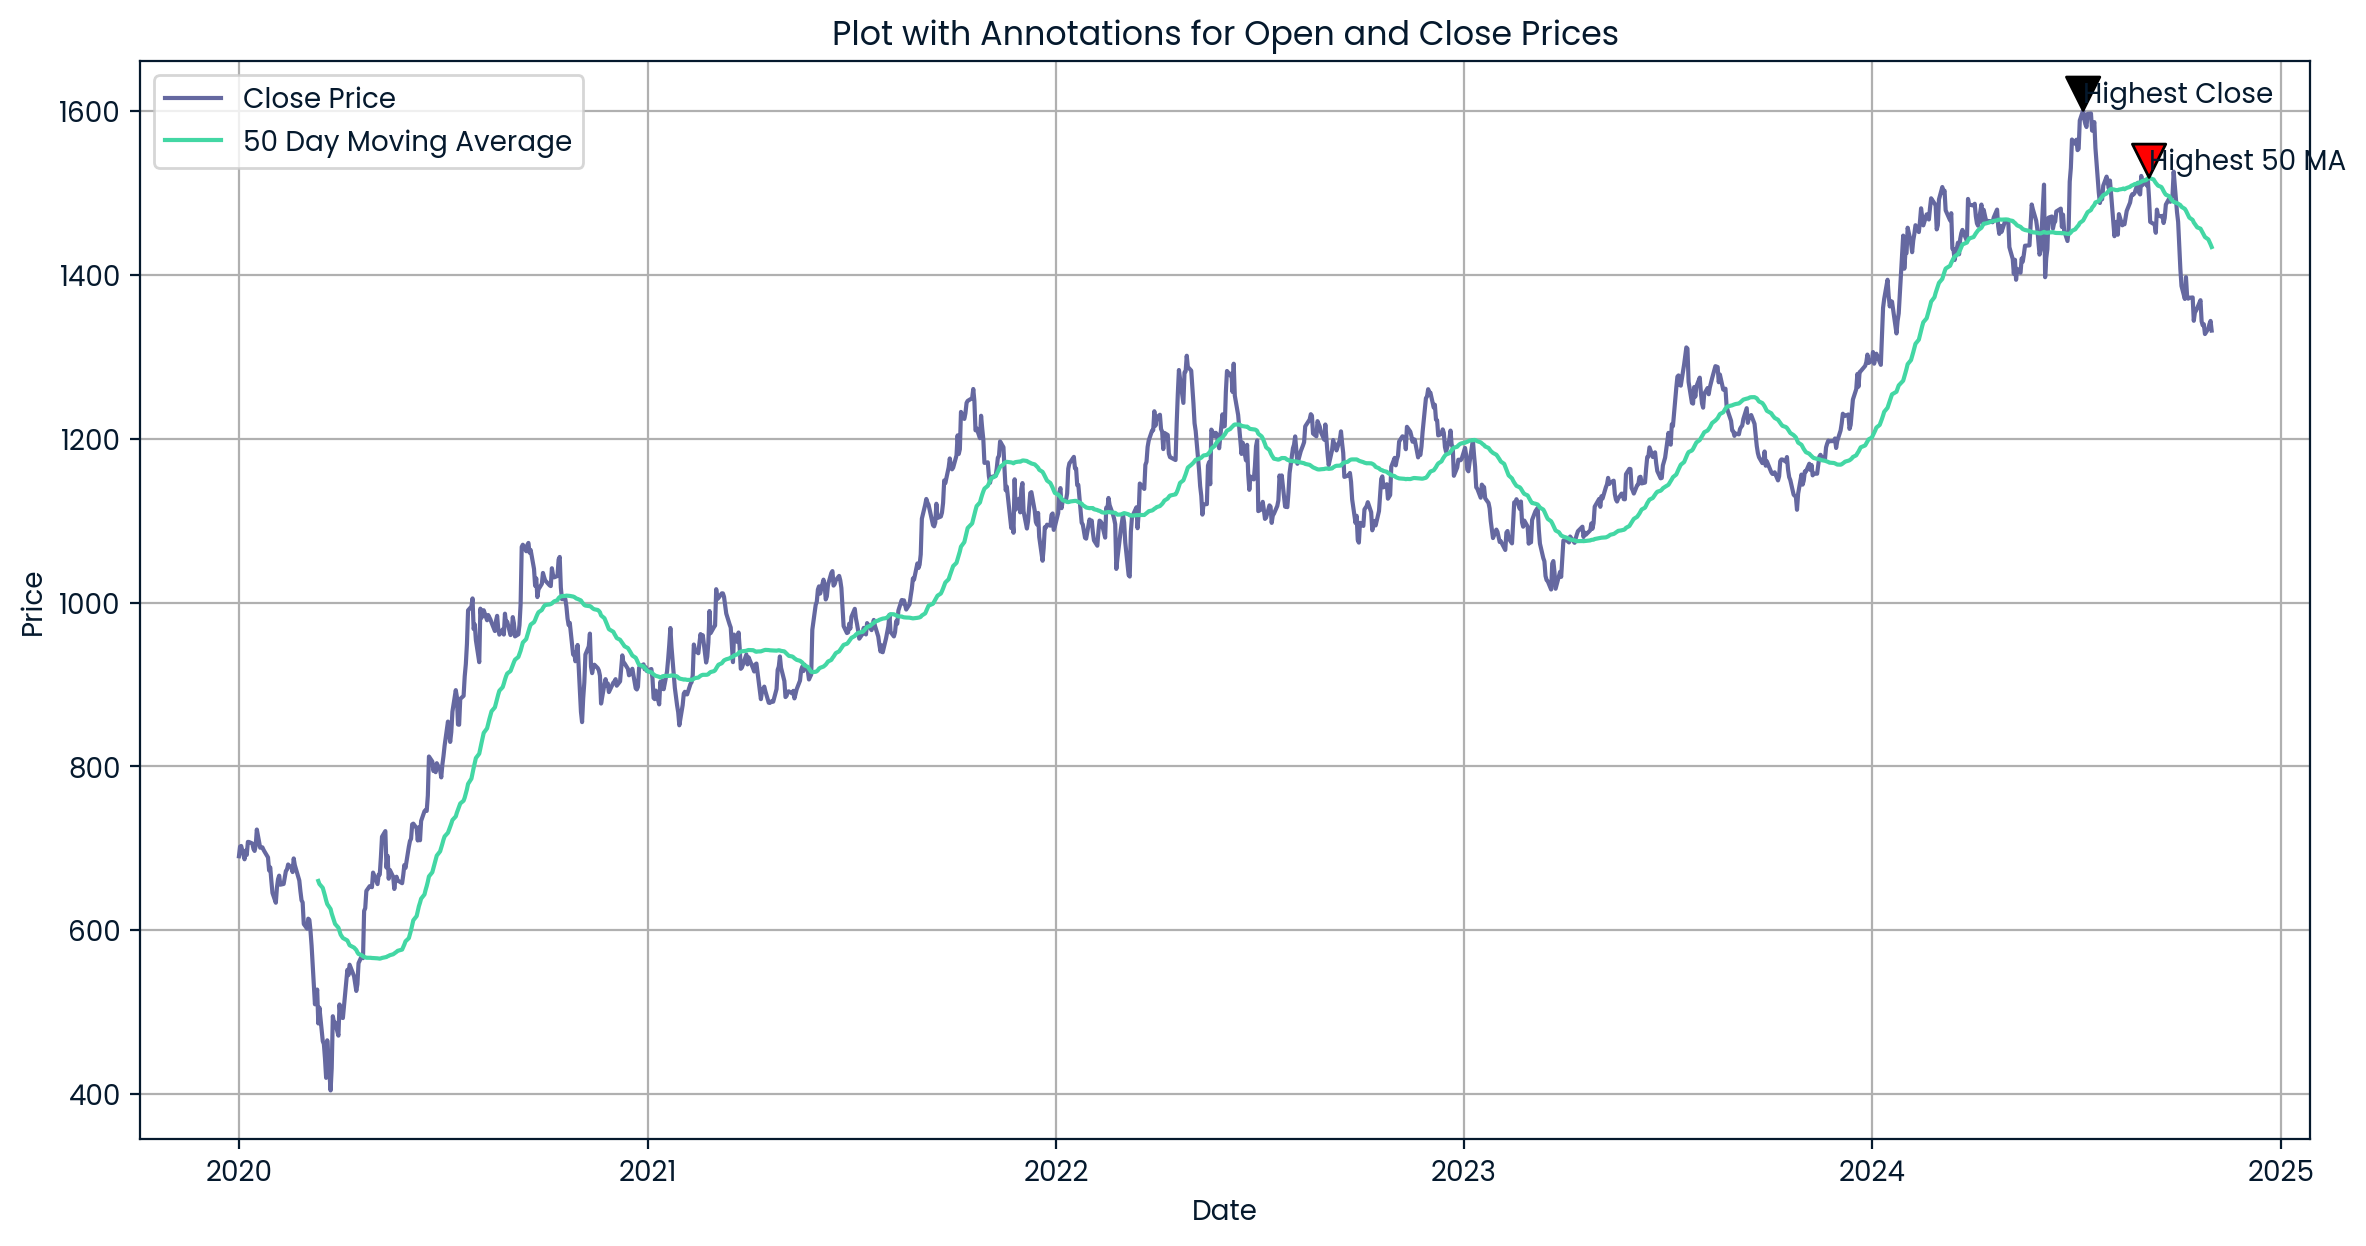

In [9]:
# Adding Annotations using stock data
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA50'], label = '50 Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Plot with Annotations for Open and Close Prices')
plt.legend()
plt.grid(True)
plt.annotate('Highest Close', xy=(df['Close'].idxmax(), df['Close'].max()), 
             xytext=(df['Close'].idxmax(), df['Close'].max() + 10),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Highest 50 MA', xy=(df['MA50'].idxmax(), df['MA50'].max()), 
             xytext=(df['MA50'].idxmax(), df['MA50'].max() + 10),
             arrowprops=dict(facecolor='red', shrink=0.05))
plt.show()


## Saving the plot

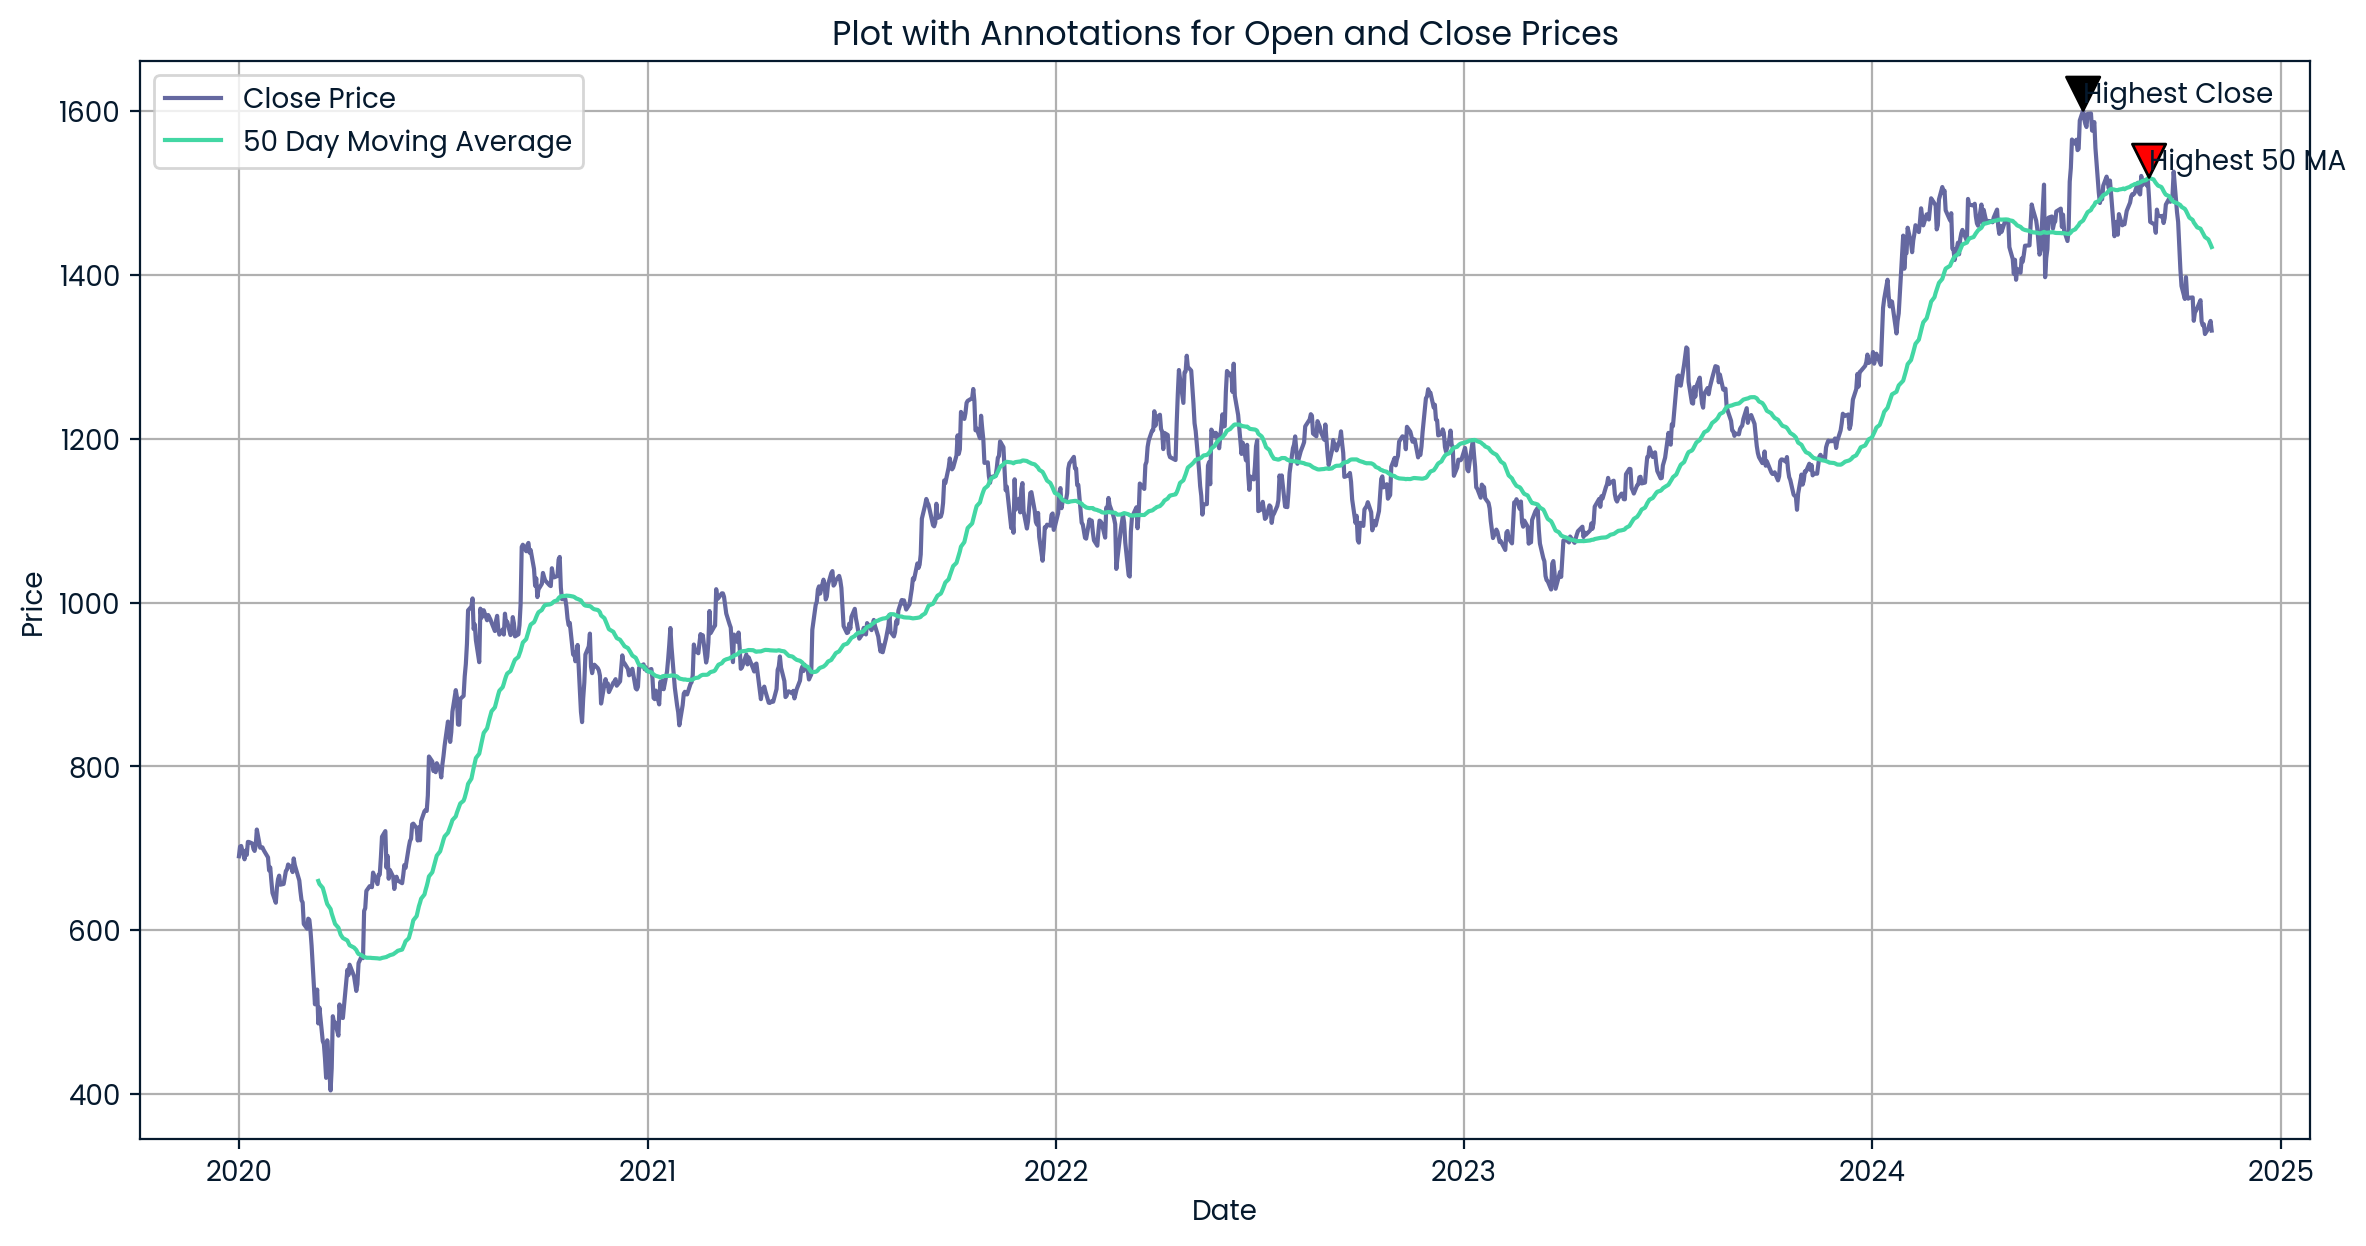

In [10]:
# Saving the plot
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA50'], label = '50 Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Plot with Annotations for Open and Close Prices')
plt.legend()
plt.grid(True)
plt.annotate('Highest Close', xy=(df['Close'].idxmax(), df['Close'].max()), 
             xytext=(df['Close'].idxmax(), df['Close'].max() + 10),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Highest 50 MA', xy=(df['MA50'].idxmax(), df['MA50'].max()), 
             xytext=(df['MA50'].idxmax(), df['MA50'].max() + 10),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.savefig('stock_line_plot.png')  # Save the plot as a .png file
plt.show()

## Resampling
- Daily (D)
- Weekly (W)
- Semi Monthly (SM)
- Monthly (M)
- Quarterly (Q)

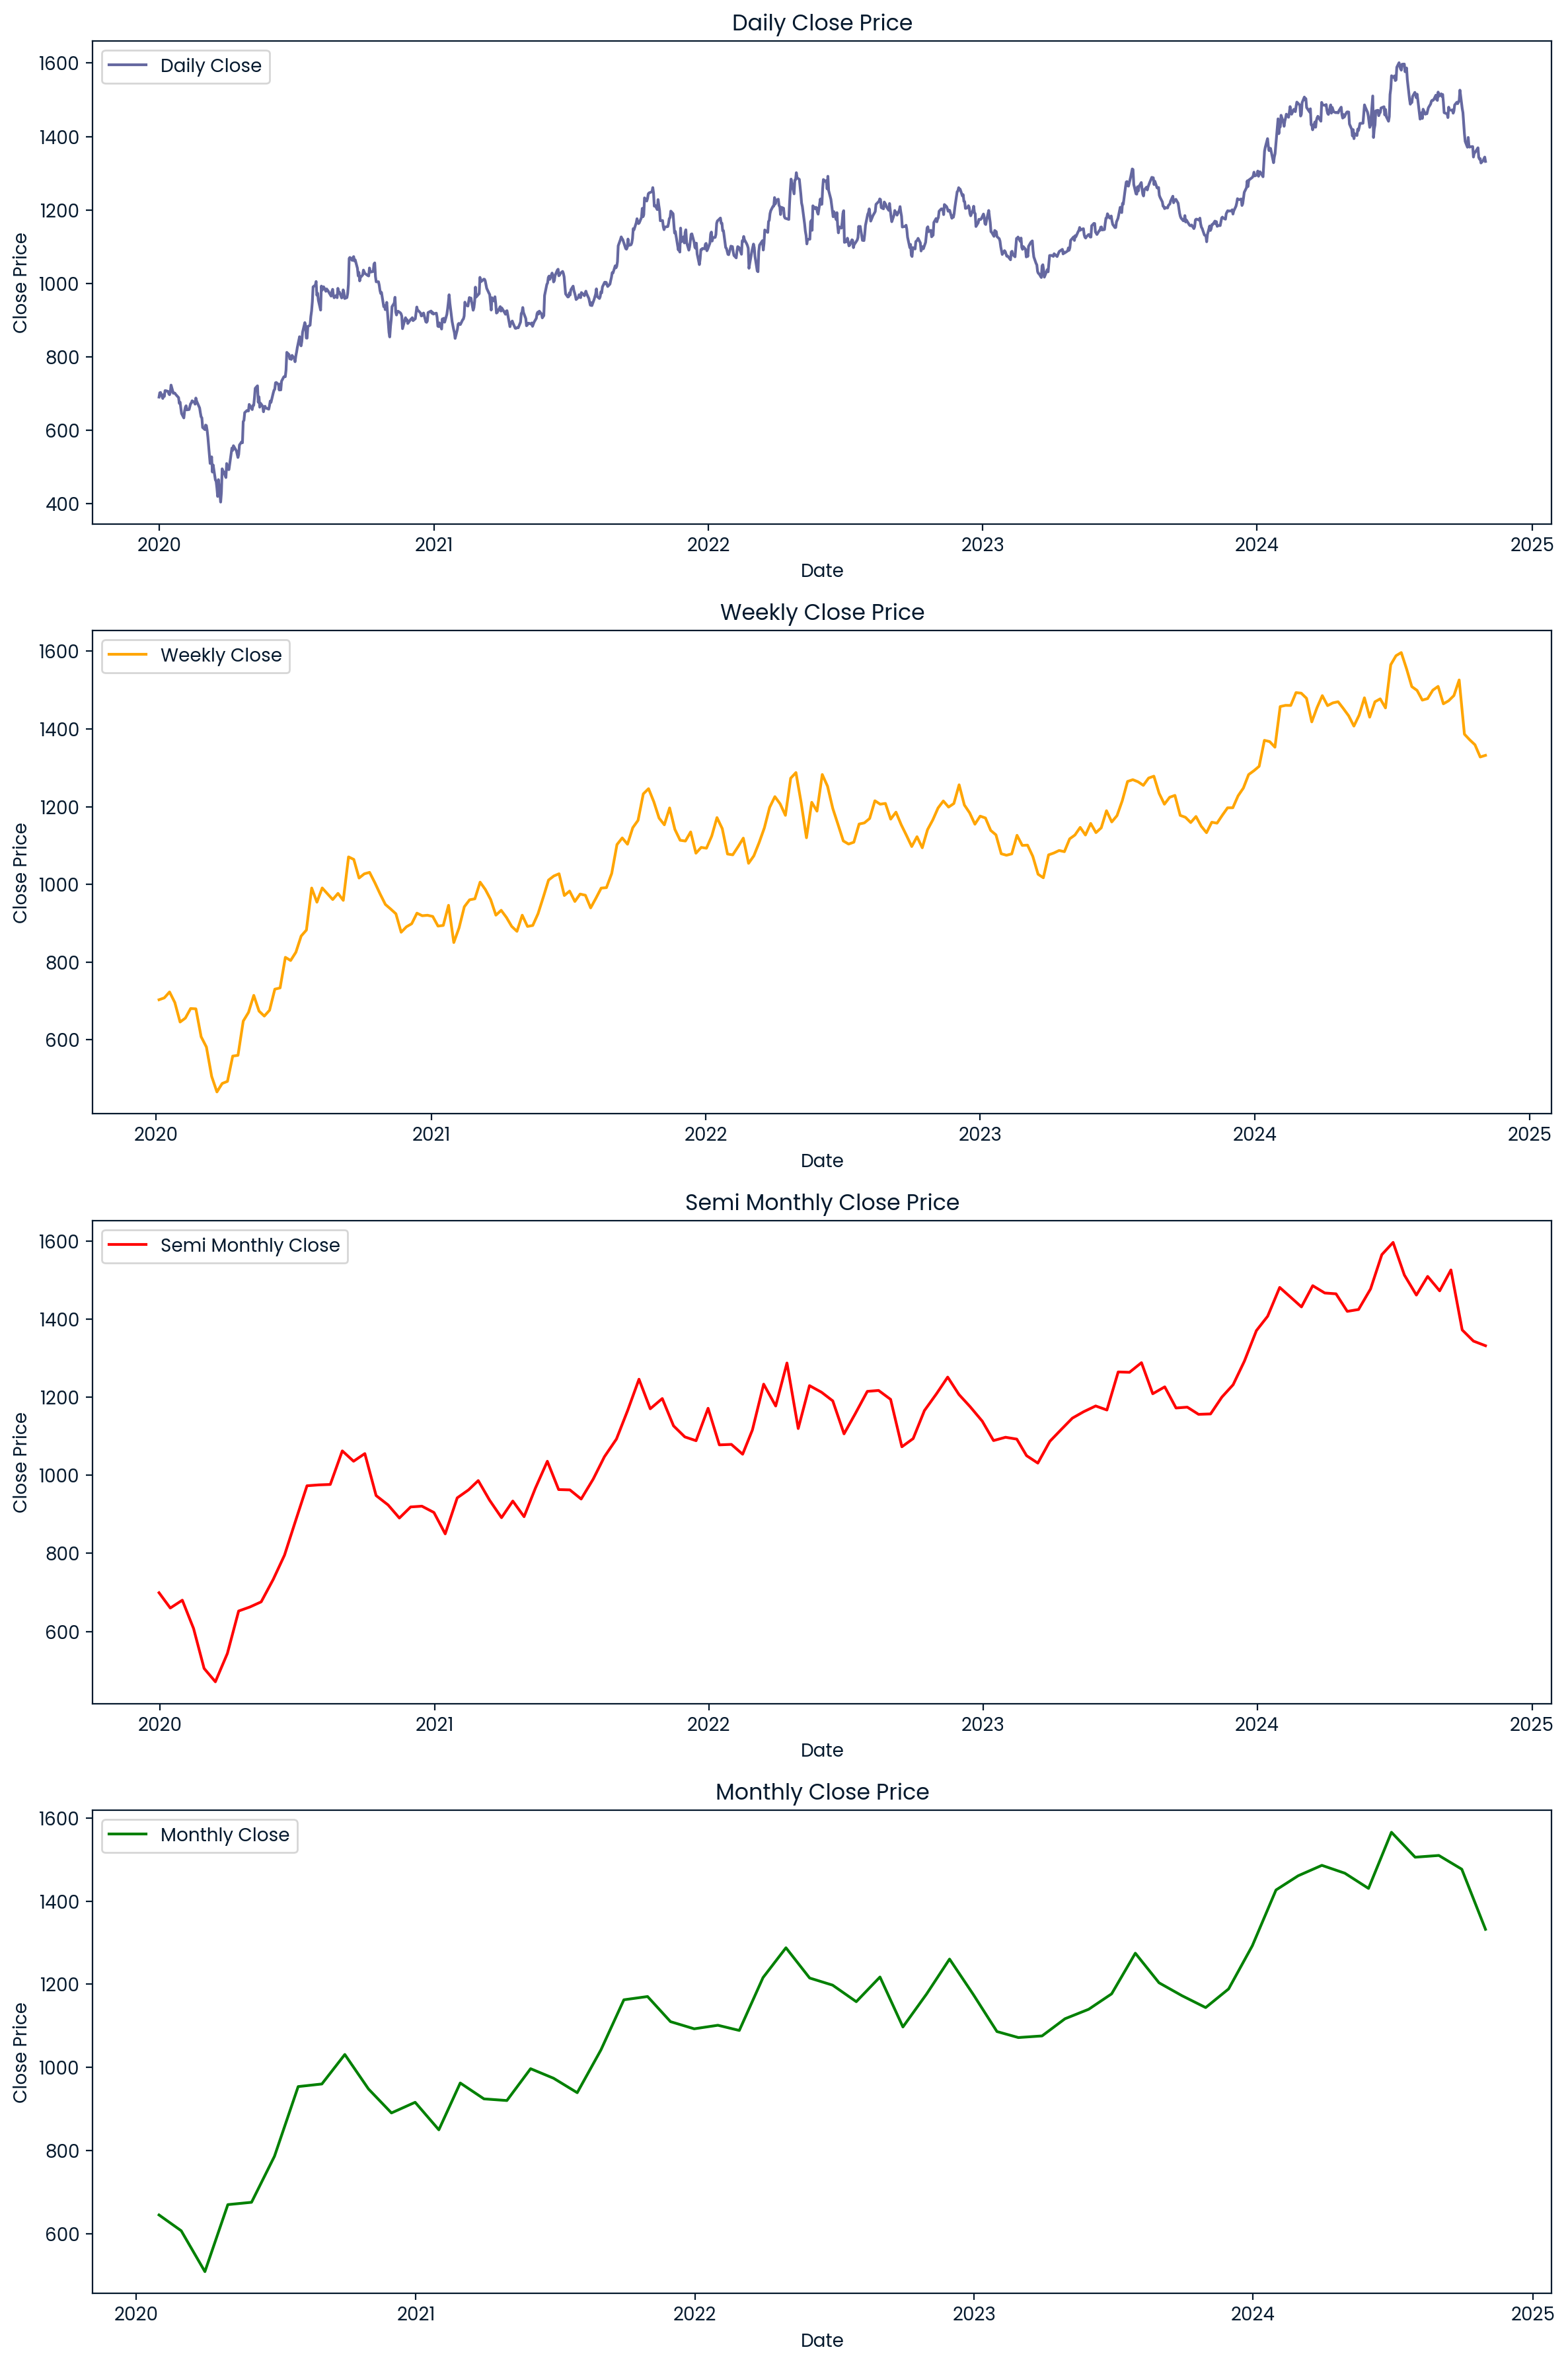

In [11]:
import matplotlib.pyplot as plt

# Assuming 'data' and 'df' have a datetime index

# Resample to weekly data
weekly_data = data.resample('W').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Adj Close': 'last',
    'Volume': 'sum'
})

sm_data = data.resample('SM').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Adj Close': 'last',
    'Volume': 'sum'
})

# Resample to monthly data
monthly_data = data.resample('M').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Adj Close': 'last',
    'Volume': 'sum'
})

# Plotting the daily, weekly, and monthly charts
fig, axes = plt.subplots(4, 1, figsize=(12, 18))

# Daily chart
axes[0].plot(data.index, data['Close'], label='Daily Close')
axes[0].set_title('Daily Close Price')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Close Price')
axes[0].legend()

# Weekly chart
axes[1].plot(weekly_data.index, weekly_data['Close'], label='Weekly Close', color='orange')
axes[1].set_title('Weekly Close Price')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Close Price')
axes[1].legend()

# Semi Monthly Chart
axes[2].plot(sm_data.index, sm_data['Close'], label='Semi Monthly Close', color='red')
axes[2].set_title('Semi Monthly Close Price')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Close Price')
axes[2].legend()

# Monthly chart
axes[3].plot(monthly_data.index, monthly_data['Close'], label='Monthly Close', color='green')
axes[3].set_title('Monthly Close Price')
axes[3].set_xlabel('Date')
axes[3].set_ylabel('Close Price')
axes[3].legend()

plt.tight_layout()
plt.show()